In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [9]:
file_str = ['ground_truth_{}','particle_uncertainty_truth_{}']
params = ["0.000000.csv","0.050000.csv","0.100000.csv","0.150000.csv","0.200000.csv","0.250000.csv","0.300000.csv","0.350000.csv","0.400000.csv","0.450000.csv","0.500000.csv",
"0.550000.csv","0.600000.csv","0.650000.csv","0.700000.csv","0.750000.csv","0.800000.csv","0.850000.csv","0.900000.csv","0.950000.csv"]


original_dfs = []

for st in file_str:
    for val in params:
        if('particle_uncertainty_truth' in st and val in "0.500000.csv"):
            continue
        fh = st.format(val)
        df = pd.read_csv(fh,header=None)
        
        df =df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
        df['parameter_uncertainty']  = float(val.replace(".csv",""))
        df['mode'] = st[:-3]
        df = df.tail(30)
        original_dfs.append(df)
        
dfs = pd.concat(original_dfs)
        
        


In [10]:
dfs.groupby(['mode','parameter_uncertainty']).median()

time_taken_lec  \
mode                       parameter_uncertainty                   
ground_truth               0.00                         0.799483   
                           0.05                         0.782686   
                           0.10                         0.801200   
                           0.15                         0.762620   
                           0.20                         0.633876   
                           0.25                         0.564203   
                           0.30                         0.453303   
                           0.35                         0.385254   
                           0.40                         0.366932   
                           0.45                         0.376889   
                           0.50                         0.278576   
                           0.55                         0.260464   
                           0.60                         0.233911   
                           0.65                         0.245837   
                           0.70                         0.222065   
                           0.75                         0.219720   
                           0.80                         0.201962   
                           0.85                         0.289213   
                           0.90                         0.308783   
                           0.95                         0.319985   
particle_uncertainty_truth 0.00                         0.772892   
                           0.05                         0.729191   
                           0.10                         0.730140   
                           0.15                         0.651565   
                           0.20                         0.576231   
                           0.25                         0.522364   
                           0.30                         0.415730   
                           0.35                         0.325449   
                           0.40                         0.175965   
                           0.45                         0.016091   
                           0.55                         0.002387   
                           0.60                         0.000000   
                           0.65                         0.000000   
                           0.70                         0.000000   
                           0.75                         0.000000   
                           0.80                         0.000000   
                           0.85                         0.000000   
                           0.90                         0.000000   
                           0.95                         0.000000   

                                                  time_taken_safety_controller  \
mode                       parameter_uncertainty                                 
ground_truth               0.00                                       0.200517   
                           0.05                                       0.217314   
                           0.10                                       0.198800   
                           0.15                                       0.237380   
                           0.20                                       0.366125   
                           0.25                                       0.435798   
                           0.30                                       0.546697   
                           0.35                                       0.614746   
                           0.40                                       0.633068   
                           0.45                                       0.623111   
                           0.50                                       0.721424   
                           0.55                                       0.739537   
                           0.60                                       0.766089   
                           0.65

In [11]:
median_res = dfs.groupby(['mode','parameter_uncertainty']).median().reset_index()
median_gt = median_res[median_res['mode'] == 'ground_truth']
median_pu = median_res[median_res['mode'] == 'particle_uncertainty_truth']
median_gt

,mode,parameter_uncertainty,time_taken_lec,time_taken_safety_controller,area
0,ground_truth,0.00,0.799483,0.200517,2.902145
1,ground_truth,0.05,0.782686,0.217314,4.875480
2,ground_truth,0.10,0.801200,0.198800,7.454125
3,ground_truth,0.15,0.762620,0.237380,10.557350
4,ground_truth,0.20,0.633876,0.366125,14.554050
5,ground_truth,0.25,0.564203,0.435798,19.020700
6,ground_truth,0.30,0.453303,0.546697,24.047850
7,ground_truth,0.35,0.385254,0.614746,30.818500
8,ground_truth,0.40,0.366932,0.633068,39.385500
9,ground_truth,0.45,0.376889,0.623111,47.714200


In [12]:
median_res

,mode,parameter_uncertainty,time_taken_lec,time_taken_safety_controller,area
0,ground_truth,0.00,0.799483,0.200517,2.902145
1,ground_truth,0.05,0.782686,0.217314,4.875480
2,ground_truth,0.10,0.801200,0.198800,7.454125
3,ground_truth,0.15,0.762620,0.237380,10.557350
4,ground_truth,0.20,0.633876,0.366125,14.554050
5,ground_truth,0.25,0.564203,0.435798,19.020700
6,ground_truth,0.30,0.453303,0.546697,24.047850
7,ground_truth,0.35,0.385254,0.614746,30.818500
8,ground_truth,0.40,0.366932,0.633068,39.385500
9,ground_truth,0.45,0.376889,0.623111,47.714200


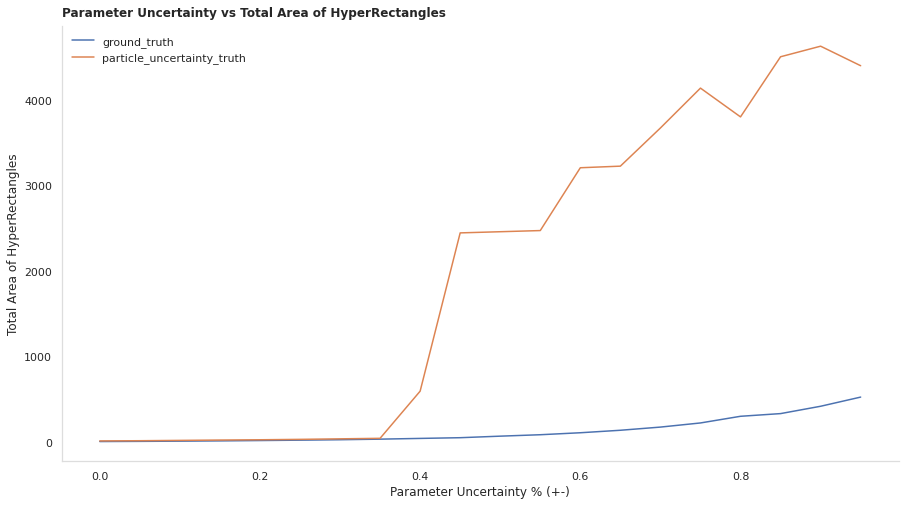

In [13]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_res, x="parameter_uncertainty",y="area",hue="mode")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Total Area of HyperRectangles")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Total Area of HyperRectangles",loc='left',pad=10.0,fontweight="bold")

In [14]:
median_gt

,mode,parameter_uncertainty,time_taken_lec,time_taken_safety_controller,area
0,ground_truth,0.00,0.799483,0.200517,2.902145
1,ground_truth,0.05,0.782686,0.217314,4.875480
2,ground_truth,0.10,0.801200,0.198800,7.454125
3,ground_truth,0.15,0.762620,0.237380,10.557350
4,ground_truth,0.20,0.633876,0.366125,14.554050
5,ground_truth,0.25,0.564203,0.435798,19.020700
6,ground_truth,0.30,0.453303,0.546697,24.047850
7,ground_truth,0.35,0.385254,0.614746,30.818500
8,ground_truth,0.40,0.366932,0.633068,39.385500
9,ground_truth,0.45,0.376889,0.623111,47.714200


No handles with labels found to put in legend.


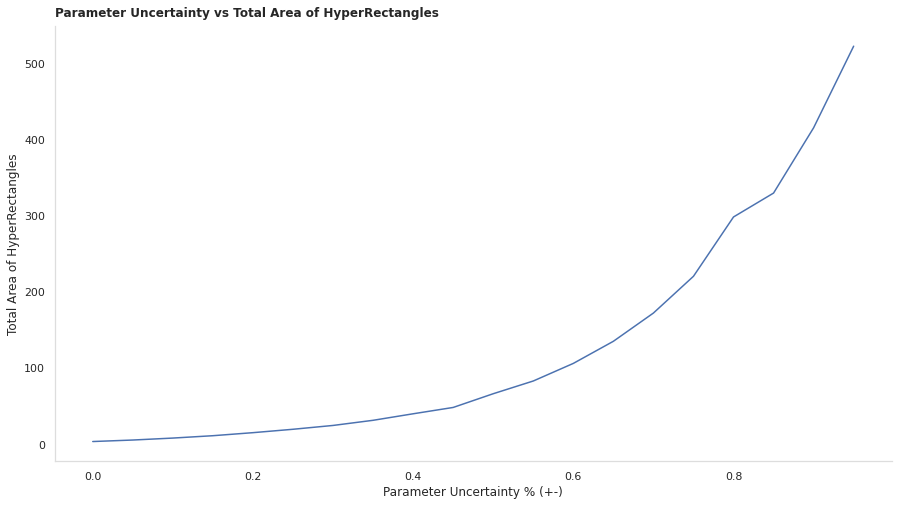

In [15]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y="area")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Total Area of HyperRectangles")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Total Area of HyperRectangles",loc='left',pad=10.0,fontweight="bold")

No handles with labels found to put in legend.


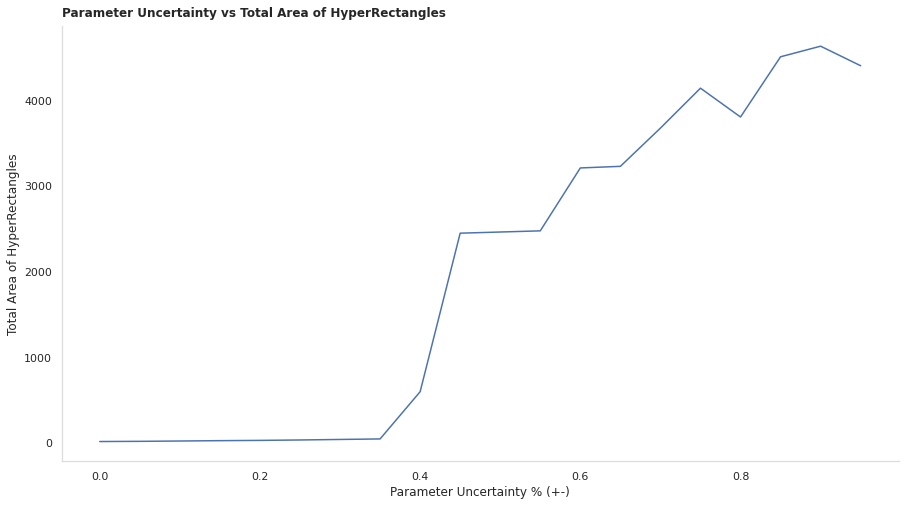

In [16]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="area")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Total Area of HyperRectangles")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Total Area of HyperRectangles",loc='left',pad=10.0,fontweight="bold")

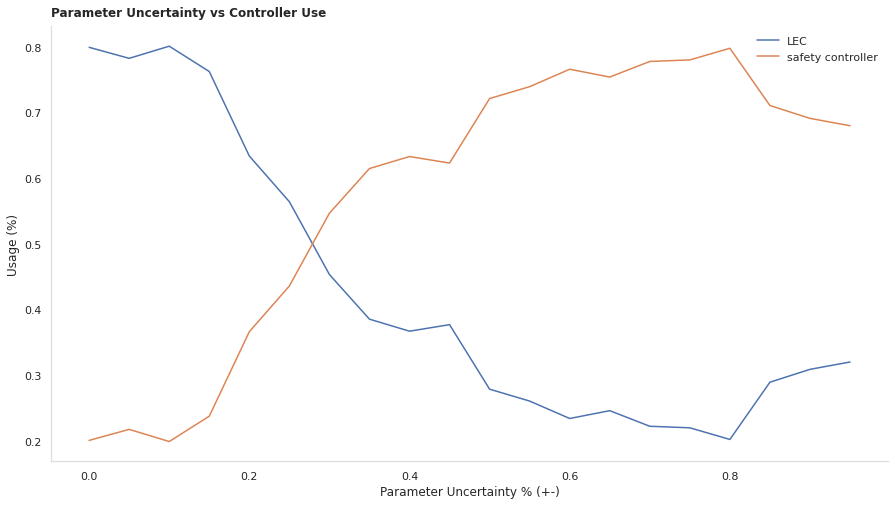

In [17]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y="time_taken_lec", label='LEC')
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Usage (%)")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold")

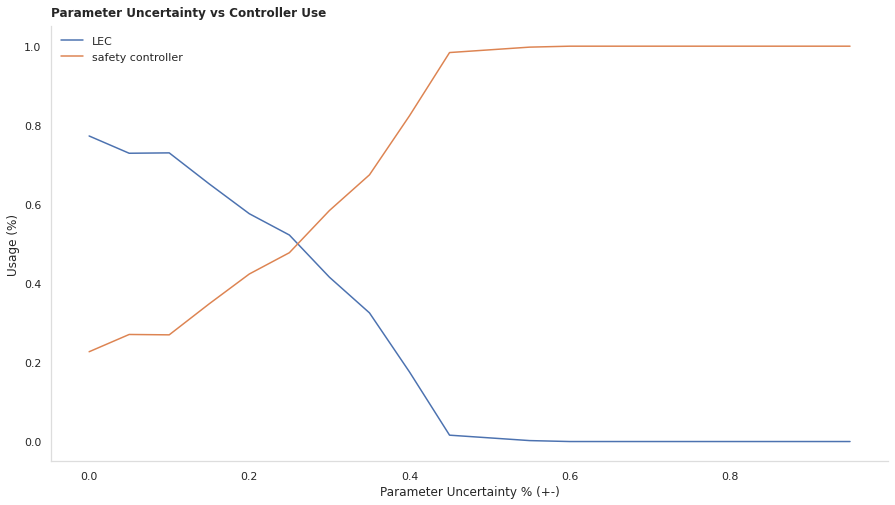

In [18]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_lec", label='LEC')
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Usage (%)")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold")

### Experiments Varying Uncertainty and Reachability Horizon

In [28]:
params = ["0.000000","0.050000","0.100000","0.150000","0.200000","0.250000","0.300000","0.350000","0.400000","0.450000","0.500000",
"0.550000","0.600000","0.650000","0.700000","0.750000","0.800000","0.850000","0.900000","0.950000"]

reachtime = ["0.500000","0.600000","0.700000","0.800000","0.900000","1.000000","1.100000", "1.200000","1.300000",
"1.400000","1.500000","1.600000","1.700000","1.800000","1.800000","1.900000","2.000000"]

file_str = "ground_truth_{}_{}_.csv"
original_dfs = []
for uncp in params:
    for rt in reachtime: 
        filepath = file_str.format(uncp,rt)
        
        try:
            df = pd.read_csv(filepath,header=None)
            df = df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
            df['parameter_uncertainty']  = uncp
            df['reach_time']  = rt
            original_dfs.append(df)

        except Exception as e:
            continue
            #print(filepath,e)
            
reach_uncertainty = dfs = pd.concat(original_dfs)


In [29]:
reach_uncertainty

,time_str,time_taken_lec,time_taken_safety_controller,area,parameter_uncertainty,reach_time
0,22/03/2022/14:45:24,0.987654,0.012346,3.29544,0.000000,0.500000
1,22/03/2022/14:46:15,0.923977,0.076023,3.07730,0.000000,0.500000
2,22/03/2022/14:47:34,0.985014,0.014986,3.06432,0.000000,0.500000
3,22/03/2022/14:48:20,0.912088,0.087912,3.12691,0.000000,0.500000
4,22/03/2022/14:49:07,0.859107,0.140893,3.08200,0.000000,0.500000
...,...,...,...,...,...,...
3,27/03/2022/09:34:38,0.071661,0.928339,10823.80000,0.900000,2.000000
4,27/03/2022/09:36:49,0.165595,0.834405,9872.37000,0.900000,2.000000
5,27/03/2022/09:39:00,0.070090,0.929910,10606.50000,0.900000,2.000000
6,27/03/2022/09:41:12,0.167072,0.832928,11330.80000,0.900000,2.000000
